In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv("./data/companies.txt", sep="\t", encoding = "unicode_escape")
rounds2 = pd.read_csv("./data/rounds2.csv",encoding='unicode_escape')
mapping = pd.read_csv("./data/mapping.csv", encoding = "unicode_escape")

In [3]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower() # formatting to identify duplicacy and uniqueness

In [4]:
unirounds2=len(rounds2["company_permalink"].unique())
unirounds2 # no of unique companies in rounds2

66370

In [5]:
unicompanies=len(companies.permalink.unique())
unicompanies # of unique companies in companies.csv

66368

In [6]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink") #master data frame merge

In [12]:
master_frame.isnull().sum() # sum of mssing values in rows (percentage)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [ ]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1) # deleting non required columns

In [15]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()] # cleaning the null in raised amount as this is important field
master_frame['raised_amount_usd'].isnull().sum()

0

In [16]:
master_frame=master_frame[~master_frame.country_code.isnull()]
master_frame=master_frame[~master_frame.category_list.isnull()] # cleaning other useful important columns 

In [17]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [18]:
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1) # removing other non essential columns

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [20]:
len(master_frame.index)/114942  # we have lost 33% of data till now :)

0.7702058429468776

In [21]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])] # filtering the type of investment preferred by SF 

In [25]:
ventures = master_frame[master_frame["funding_round_type"]=="venture"]
countrytoinvest = ventures.groupby('country_code')
countrytoinvest['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
Name: raised_amount_usd, dtype: float64

In [29]:
top9 = ventures[ventures['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [28]:
top9=top9[~top9.category_list.isnull()]

In [30]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


In [39]:
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

C:\Users\kmirani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:

top9.shape

(44118, 11)

In [41]:
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [42]:
def correctMapping0(category):
## Function to correct the mapping data.It can be observed fromt the data 
##that at many places in the category_class column the 'na' is misprinded as '0'
## Eg. 'Analysis' is present as 'A0lysis'
    if '0' in category:
        if category.startswith("0"):    # Handle 0notechnology case with capital Na
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith("0"):    # ignores the 2.0 case with 0 at the end of the string
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category

In [43]:
mapping['category_list']=list(map(correctMapping0,mapping['category_list']))

In [44]:

m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [46]:
top9=pd.merge(top9,m,how="left",left_on="primary_sector",right_on="category_list")
top9=top9.drop('category_list_y',axis=1)

In [48]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector_x,category_list,main_sector_y
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Media,Entertainment,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Curated Web,"News, Search and Messaging",Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Cleantech / Semiconductors,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",Analytics,"Social, Finance, Analytics, Advertising"


In [51]:
top9=top9[~(top9['main_sector_y'].isnull())]

In [52]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector_x,category_list,main_sector_y
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Media,Entertainment,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Curated Web,"News, Search and Messaging",Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Cleantech / Semiconductors,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",Analytics,"Social, Finance, Analytics, Advertising"


In [55]:
D1=top9[top9['country_code']=='USA'] ## USA
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]
D1.raised_amount_usd.sum()

107757097294.0

In [59]:
D1_by_sector=D1.groupby('main_sector_y')
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector_y
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

In [61]:
D1[D1['main_sector_y']=='Others'].groupby(['main_sector_y','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector_y  permalink                        
Others         /organization/virtustream            64300000.0
               /organization/capella                54968051.0
               /organization/airtight-networks      54201907.0
               /organization/decarta                52100000.0
               /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [62]:
# 2nd best sector to invest
D1[D1['main_sector_y']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector_y','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector_y                            permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [66]:
D2=top9[top9['country_code']=='CHN']  ## china
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2.raised_amount_usd.sum()

4946061053.0

In [68]:
D2_by_sector=D2.groupby('main_sector_y')
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector_y
Others                                     1.431697e+09
Social, Finance, Analytics, Advertising    1.011973e+09
News, Search and Messaging                 7.308213e+08
Entertainment                              5.504380e+08
Cleantech / Semiconductors                 3.767425e+08
Health                                     3.561081e+08
Manufacturing                              3.160024e+08
Automotive & Sports                        1.722786e+08
Name: raised_amount_usd, dtype: float64

In [70]:
D2[D2['main_sector_y']=='Others'].groupby(['main_sector_y','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector_y  permalink                 
Others         /organization/kargocard       27500000.0
               /organization/51-com          27000000.0
               /organization/xiaozhu-com     25000000.0
               /organization/vipstore-com    25000000.0
               /organization/wacai           25000000.0
Name: raised_amount_usd, dtype: float64

In [73]:
D2[D2['main_sector_y']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector_y','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector_y                            permalink                                               
Social, Finance, Analytics, Advertising  /organization/beijing-second-hand-information-company       30000000.0
                                         /organization/qunar-com                                     25000000.0
                                         /organization/feidee                                        25000000.0
                                         /organization/shanghai-unionpay-merchant-services-co-ltd    22900000.0
                                         /organization/borqs                                         22572725.0
Name: raised_amount_usd, dtype: float64

In [74]:
D3=top9[top9['country_code']=='GBR']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3.raised_amount_usd.sum()

5379078691.0

In [75]:
D3_by_sector=D3.groupby('main_sector_y')
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector_y
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [76]:

D3[D3['main_sector_y']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector_y','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector_y                            permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

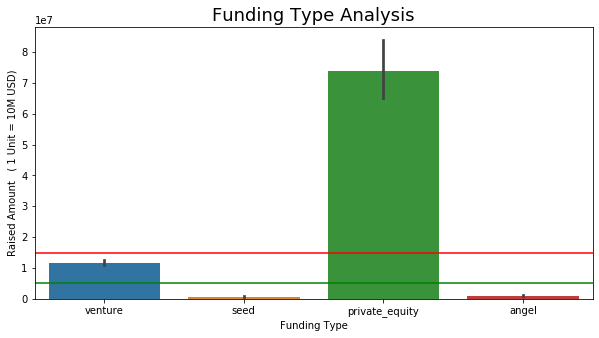

In [77]:
# bar plot
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

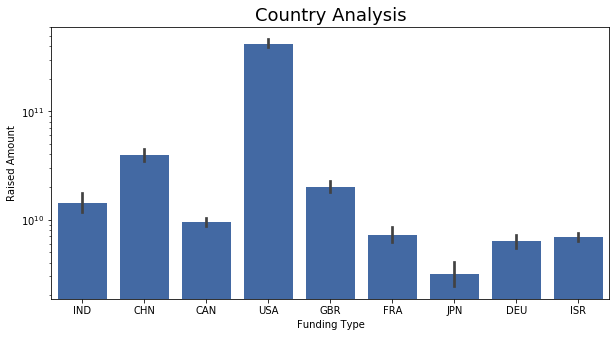

In [78]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

In [83]:
master_D=D1[D1['main_sector_y'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
master_D=master_D.append(D2[D2['main_sector_y'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)
master_D=master_D.append(D3[D3['main_sector_y'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

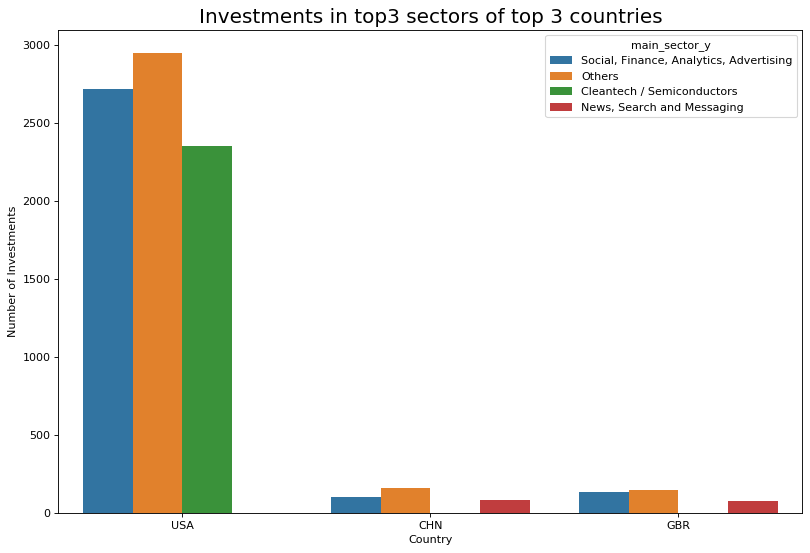

In [85]:

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector_y", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()